In [1]:
import keras

new_model = keras.models.load_model("../weights/gridtracknet.h5")

2025-03-09 18:06:23.924289: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-09 18:06:24.020689: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741539984.059103    8418 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741539984.070183    8418 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 18:06:24.159757: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

ValueError: No model config found in the file at ../weights/gridtracknet.h5.

In [1]:
from tiny_ball_detector.models.gridtracknet import gridTrackNet

model = gridTrackNet(5, 432, 768)
model.build((None, 432, 768, 3))
model.load_weights("../weights/gridtracknet.h5")

2025-03-25 23:17:23.265740: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-25 23:17:23.393830: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742941043.452714    7199 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742941043.466418    7199 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-25 23:17:23.579679: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
import logging
from pathlib import Path
from tiny_ball_detector.dataset.tracknet_dataset import TrackNetDataset

logger = logging.getLogger("FrameGeneratorLogger")

trackNetDataset = TrackNetDataset(
    path=Path("../data/tennis"), n_frames=5, logger=logger
)

In [3]:
dataset = trackNetDataset.dataset(1, 432, 768)

ClipDataset(game='game1', clip='Clip1', clip_path=PosixPath('../data/tennis/input/game1/Clip1'))
DDDDDDD
(None, None, 3)
DDDDDDD
(None, None, 1)
ClipDataset(game='game1', clip='Clip10', clip_path=PosixPath('../data/tennis/input/game1/Clip10'))
DDDDDDD
(None, None, 3)
DDDDDDD
(None, None, 1)
ClipDataset(game='game1', clip='Clip11', clip_path=PosixPath('../data/tennis/input/game1/Clip11'))
DDDDDDD
(None, None, 3)
DDDDDDD
(None, None, 1)
ClipDataset(game='game1', clip='Clip12', clip_path=PosixPath('../data/tennis/input/game1/Clip12'))
DDDDDDD
(None, None, 3)
DDDDDDD
(None, None, 1)
ClipDataset(game='game1', clip='Clip13', clip_path=PosixPath('../data/tennis/input/game1/Clip13'))
DDDDDDD
(None, None, 3)
DDDDDDD
(None, None, 1)
ClipDataset(game='game1', clip='Clip14', clip_path=PosixPath('../data/tennis/input/game1/Clip14'))
DDDDDDD
(None, None, 3)
DDDDDDD
(None, None, 1)
ClipDataset(game='game1', clip='Clip2', clip_path=PosixPath('../data/tennis/input/game1/Clip2'))
DDDDDDD
(None, None, 3)

In [4]:
import logging
from pathlib import Path
from tiny_ball_detector.dataset.tracknet_dataset import TrackNetDataset

next(iter(trackNetDataset.clip(1, 14, 1, 432, 768)))

ClipDataset(game='game1', clip='Clip14', clip_path=PosixPath('../data/tennis/input/game1/Clip14'))
DDDDDDD
(None, None, 3)
DDDDDDD
(None, None, 3)


2025-03-25 23:18:03.032268: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


(<tf.Tensor: shape=(1, 432, 768, 15), dtype=float32, numpy=
 array([[[[0.01176471, 0.01568628, 0.        , ..., 0.01176471,
           0.01568628, 0.        ],
          [0.01176471, 0.01568628, 0.        , ..., 0.01176471,
           0.01568628, 0.        ],
          [0.01176471, 0.01568628, 0.        , ..., 0.01176471,
           0.01568628, 0.        ],
          ...,
          [0.07450981, 0.06666667, 0.10980393, ..., 0.07450981,
           0.06666667, 0.10980393],
          [0.07450981, 0.06666667, 0.10980393, ..., 0.07450981,
           0.06666667, 0.10980393],
          [0.07450981, 0.06666667, 0.10980393, ..., 0.07450981,
           0.06666667, 0.10980393]],
 
         [[0.01176471, 0.01568628, 0.        , ..., 0.01176471,
           0.01568628, 0.        ],
          [0.01176471, 0.01568628, 0.        , ..., 0.01176471,
           0.01568628, 0.        ],
          [0.01176471, 0.01568628, 0.        , ..., 0.01176471,
           0.01568628, 0.        ],
          ...,
       

In [5]:
import numpy as np
import tensorflow as tf

WIDTH = 768
HEIGHT = 432
IMGS_PER_INSTANCE = 5
GRID_COLS = 48
GRID_ROWS = 27
GRID_SIZE_COL = WIDTH / GRID_COLS
GRID_SIZE_ROW = HEIGHT / GRID_ROWS


def getPredictions(frames, isBGRFormat=False):
    y_pred = model.predict(tf.transpose(frames, (0, 3, 1, 2)))

    y_pred = np.split(y_pred, IMGS_PER_INSTANCE, axis=1)
    y_pred = np.stack(y_pred, axis=2)
    y_pred = np.moveaxis(y_pred, 1, -1)

    confGrid, xOffsetGrid, yOffsetGrid = np.split(y_pred, 3, axis=-1)

    confGrid = np.squeeze(confGrid, axis=-1)
    xOffsetGrid = np.squeeze(xOffsetGrid, axis=-1)
    yOffsetGrid = np.squeeze(yOffsetGrid, axis=-1)

    ballCoordinates = []
    for i in range(0, confGrid.shape[0]):
        for j in range(0, confGrid.shape[1]):
            currConfGrid = confGrid[i][j]
            currXOffsetGrid = xOffsetGrid[i][j]
            currYOffsetGrid = yOffsetGrid[i][j]

            maxConfVal = np.max(currConfGrid)
            predRow, predCol = np.unravel_index(
                np.argmax(currConfGrid), currConfGrid.shape
            )

            threshold = 0.5
            predHasBall = maxConfVal >= threshold

            xOffset = currXOffsetGrid[predRow][predCol]
            yOffset = currYOffsetGrid[predRow][predCol]

            xPred = int((xOffset + predCol) * GRID_SIZE_COL)
            yPred = int((yOffset + predRow) * GRID_SIZE_ROW)

            if predHasBall:
                ballCoordinates.append(
                    (
                        int((xPred / WIDTH) * WIDTH),
                        int((yPred / HEIGHT) * HEIGHT),
                    )
                )
            else:
                ballCoordinates.append((0, 0))

    return ballCoordinates

ClipDataset(game='game1', clip='Clip14', clip_path=PosixPath('../data/tennis/input/game1/Clip14'))
DDDDDDD
(None, None, 3)
DDDDDDD
(None, None, 3)


2025-03-15 13:56:01.219354: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


(1, 432, 768, 15)


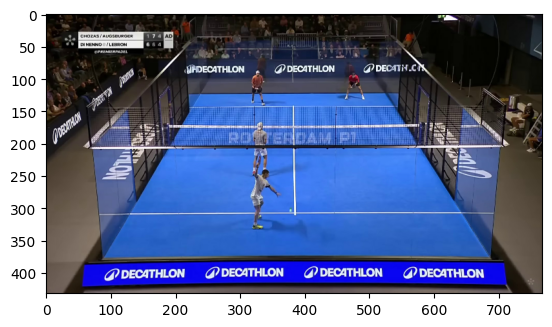

(1, 432, 768, 15)


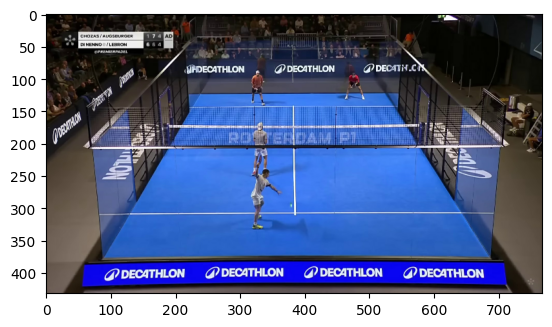

(1, 432, 768, 15)


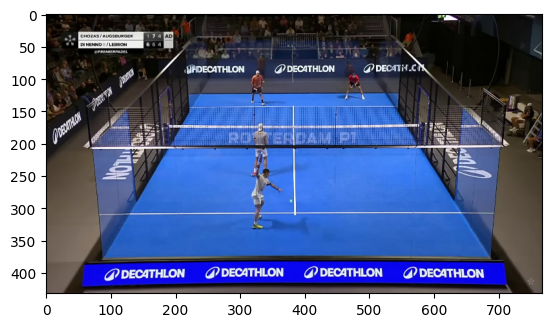

(1, 432, 768, 15)


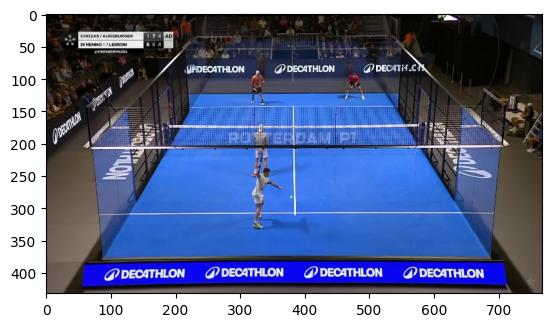

(1, 432, 768, 15)


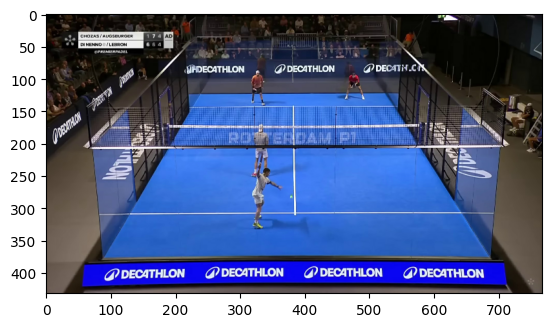

2025-03-15 13:56:01.824520: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
import matplotlib.pyplot as plt

for d in trackNetDataset.clip(1, 14, 1, 432, 768).take(1):
    for i in range(0, 5):
        image = d[0][0, ..., i * 3 : i * 3 + 3]
        print(d[0].shape)
        plt.imshow(image)
        plt.show()

In [6]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

frames = []
coordinates = []
for d in trackNetDataset.clip(1, 14, 1, 432, 768).take(20):
    image = d[0]
    coordinates.append(getPredictions(image))
    for i in range(0, 5):
        image = d[0][0, ..., i * 3 : i * 3 + 3]
        fig, ax = plt.subplots()
        ax.imshow(image)
        fig.canvas.draw()
        frame = Image.frombytes(
            "RGBA", fig.canvas.get_width_height(), fig.canvas.buffer_rgba()
        )
        frames.append(frame)
        plt.close(fig)

frames[0].save(
    "output.gif",
    save_all=True,
    append_images=frames[1:],
    duration=10,  # Frame duration in ms
    loop=0,  # Infinite loop
)

ClipDataset(game='game1', clip='Clip14', clip_path=PosixPath('../data/tennis/input/game1/Clip14'))
DDDDDDD
(None, None, 3)
DDDDDDD
(None, None, 3)


I0000 00:00:1742941104.690823    9458 service.cc:148] XLA service 0x7e4794006240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742941104.697498    9458 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-03-25 23:18:24.708555: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742941104.775330    9458 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1742941105.916760    9458 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


2025-03-25 23:18:32.462674: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-03-25 23:18:32.757541: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


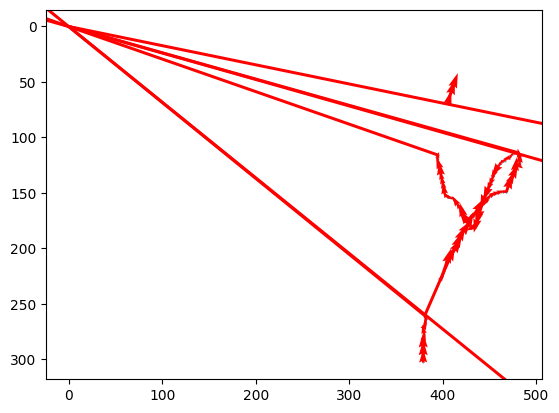

In [7]:
new_coordinates = tf.reshape(tf.constant(coordinates), (-1, 2))

plt.scatter(new_coordinates[:, 0], new_coordinates[:, 1], s=0.1)
speed_vectors = new_coordinates[:-1] - new_coordinates[1:]
plt.quiver(
    new_coordinates[:-1, 0],
    new_coordinates[:-1, 1],
    -speed_vectors[:, 0],
    -speed_vectors[:, 1],
    angles="xy",
    scale_units="xy",
    scale=0.5,
    color="r",
)
plt.gca().invert_yaxis()

In [8]:
def angle_between_vectors(A, B):
    A = tf.cast(A, tf.float32)
    B = tf.cast(B, tf.float32)
    # Produit scalaire
    dot_product = tf.reduce_sum(A * B, axis=-1)

    # Norme des vecteurs
    norm_A = tf.norm(A, axis=-1)
    norm_B = tf.norm(B, axis=-1)

    # Calcul du cosinus de l'angle
    cosine_theta = dot_product / (norm_A * norm_B)

    # Pour éviter les erreurs numériques (ex: cos(θ) > 1 à cause d'arrondis)
    cosine_theta = tf.clip_by_value(cosine_theta, -1.0, 1.0)

    # Calcul de l'angle en radians
    angle_radians = tf.acos(cosine_theta)

    # Conversion en degrés (optionnel)
    angle_degrees = angle_radians * (180.0 / np.pi)

    return angle_degrees


path = []
angles = []
idx_outliers = []
is_outlier = 1
last_speed_vector = None
for idx in range(len(new_coordinates)):
    print(f"index {idx}, {new_coordinates[idx]}, {is_outlier}")
    if idx == 0:
        path.append(new_coordinates[idx])
        continue

    c_previous = new_coordinates[idx - is_outlier]
    euclidian_distance = tf.norm(
        tf.cast(new_coordinates[idx] - c_previous, tf.float32),
        ord="euclidean",
    )
    print("euclidian_distance", euclidian_distance)
    if euclidian_distance < 40:
        if last_speed_vector is not None:
            angles.append(
                angle_between_vectors(
                    last_speed_vector,
                    new_coordinates[idx] - c_previous,
                )
            )

        last_speed_vector = tf.cast(new_coordinates[idx] - c_previous, tf.float32)
        path.append(new_coordinates[idx])
        is_outlier = 1
    else:
        print("not in path")
        idx_outliers.append(idx)
        is_outlier += 1


path

index 0, [379 303], 1
index 1, [379 297], 1
euclidian_distance tf.Tensor(6.0, shape=(), dtype=float32)
index 2, [379 290], 1
euclidian_distance tf.Tensor(7.0, shape=(), dtype=float32)
index 3, [379 283], 1
euclidian_distance tf.Tensor(7.0, shape=(), dtype=float32)
index 4, [380 279], 1
euclidian_distance tf.Tensor(4.1231055, shape=(), dtype=float32)
index 5, [380 277], 1
euclidian_distance tf.Tensor(2.0, shape=(), dtype=float32)
index 6, [379 273], 1
euclidian_distance tf.Tensor(4.1231055, shape=(), dtype=float32)
index 7, [381 269], 1
euclidian_distance tf.Tensor(4.4721355, shape=(), dtype=float32)
index 8, [381 266], 1
euclidian_distance tf.Tensor(3.0, shape=(), dtype=float32)
index 9, [382 264], 1
euclidian_distance tf.Tensor(2.2360678, shape=(), dtype=float32)
index 10, [382 264], 1
euclidian_distance tf.Tensor(0.0, shape=(), dtype=float32)
index 11, [381 262], 1
euclidian_distance tf.Tensor(2.2360678, shape=(), dtype=float32)
index 12, [381 261], 1
euclidian_distance tf.Tensor(1.0

[<tf.Tensor: shape=(2,), dtype=int32, numpy=array([379, 303], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([379, 297], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([379, 290], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([379, 283], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([380, 279], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([380, 277], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([379, 273], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([381, 269], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([381, 266], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([382, 264], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([382, 264], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([381, 262], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([381, 261], dtype=int32)>,

In [9]:
len(path)

88

In [10]:
len(new_coordinates)

100

In [11]:
angles = tf.reshape(angles, (-1)) > 90

In [12]:
idx_outliers

[13, 44, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

In [20]:
import keras

avg_pool = keras.layers.AveragePooling1D(pool_size=3, strides=1, padding="same")
new_coordinates = tf.reshape(new_coordinates, (1, -1, 2))
new_coordinates = tf.cast(new_coordinates, tf.float32)
new_coordinates = avg_pool(new_coordinates)
new_coordinates

<tf.Tensor: shape=(1, 88, 2), dtype=float32, numpy=
array([[[379.      , 300.      ],
        [379.      , 296.6667  ],
        [379.      , 290.      ],
        [379.33334 , 284.      ],
        [379.6667  , 279.6667  ],
        [379.6667  , 276.33334 ],
        [380.      , 273.      ],
        [380.33334 , 269.33334 ],
        [381.33334 , 266.33334 ],
        [381.6667  , 264.6667  ],
        [381.6667  , 263.33334 ],
        [381.33334 , 262.33334 ],
        [381.      , 261.      ],
        [386.33334 , 250.      ],
        [392.33334 , 238.33334 ],
        [400.      , 222.66667 ],
        [405.      , 213.66667 ],
        [410.6667  , 203.      ],
        [416.      , 194.33334 ],
        [420.33334 , 187.33334 ],
        [424.6667  , 180.66667 ],
        [428.33334 , 175.66667 ],
        [431.33334 , 171.66667 ],
        [434.6667  , 167.66667 ],
        [438.33334 , 163.66667 ],
        [442.33334 , 160.      ],
        [445.33334 , 157.66667 ],
        [448.      , 155.33334

In [35]:
k[0]

<tf.Tensor: shape=(86,), dtype=float32, numpy=
array([ -30.32     ,  -19.257967 ,  -29.608257 ,  -53.179146 ,
        -70.56167  ,  -65.39395  ,  -73.69087  , -149.37628  ,
       -358.73584  , -490.44287  , -400.19293  ,  -20.377989 ,
         -5.6971006,   -3.919094 ,   -4.7605524,   -7.317879 ,
         -7.394435 ,  -10.76642  ,  -13.90816  ,  -18.086222 ,
        -28.618408 ,  -34.17414  ,  -30.975523 ,  -28.968685 ,
        -38.52685  ,  -60.09563  ,  -65.61381  ,  -58.044395 ,
        -39.755123 ,  -36.722977 ,  -42.70493  ,  -57.204273 ,
       -114.73642  ,  -53.251312 ,  -27.26888  ,  -22.65058  ,
        -36.19048  ,  -71.912    , -134.19989  , -107.14667  ,
        -65.00005  ,  -72.477745 ,   -2.510957 ,  162.68864  ,
        271.2977   ,  144.96536  ,   91.93046  ,   81.17891  ,
         92.87358  ,  124.13554  ,   79.79248  ,   48.006435 ,
         43.289875 ,   49.70827  ,   57.812237 ,   43.78072  ,
         28.370033 ,   17.544167 ,   13.657047 ,   14.6301155,
        

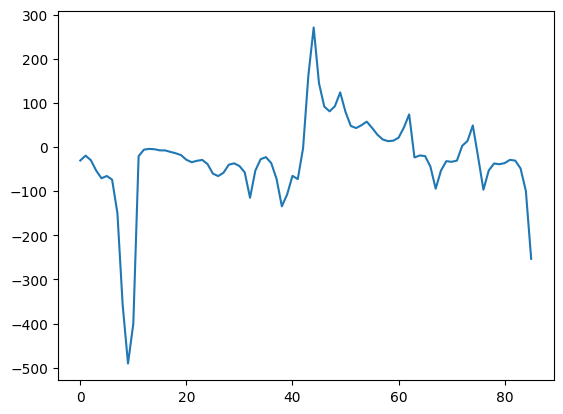

In [32]:
v = (new_coordinates[:, 2:] - new_coordinates[:, :-2]) / 2

a = new_coordinates[:, 2:] - (2 * new_coordinates[:, 1:-1]) - new_coordinates[:, :-2]

k = (v[:, :, 0] * a[:, :, 1] - v[:, :, 1] * a[:, :, 0]) / (
    v[:, :, 0] ** 2 + v[:, :, 1] ** 2
) ** 1.5

plt.plot(k[0])

In [34]:
new_coordinates[:, 1:-1]

<tf.Tensor: shape=(1, 86, 2), dtype=float32, numpy=
array([[[379.      , 296.6667  ],
        [379.      , 290.      ],
        [379.33334 , 284.      ],
        [379.6667  , 279.6667  ],
        [379.6667  , 276.33334 ],
        [380.      , 273.      ],
        [380.33334 , 269.33334 ],
        [381.33334 , 266.33334 ],
        [381.6667  , 264.6667  ],
        [381.6667  , 263.33334 ],
        [381.33334 , 262.33334 ],
        [381.      , 261.      ],
        [386.33334 , 250.      ],
        [392.33334 , 238.33334 ],
        [400.      , 222.66667 ],
        [405.      , 213.66667 ],
        [410.6667  , 203.      ],
        [416.      , 194.33334 ],
        [420.33334 , 187.33334 ],
        [424.6667  , 180.66667 ],
        [428.33334 , 175.66667 ],
        [431.33334 , 171.66667 ],
        [434.6667  , 167.66667 ],
        [438.33334 , 163.66667 ],
        [442.33334 , 160.      ],
        [445.33334 , 157.66667 ],
        [448.      , 155.33334 ],
        [450.6667  , 153.     

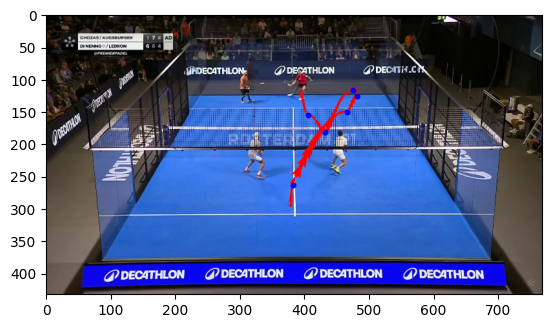

In [58]:
plt.quiver(
    new_coordinates[0, 1:-1, 0],
    new_coordinates[0, 1:-1, 1],
    v[0, :, 0],
    v[0, :, 1],
    angles="xy",
    scale_units="xy",
    scale=0.5,
    color="r",
)
plt.scatter(
    tf.gather(new_coordinates[0, 1:-1, 0], [9, 32, 38, 44, 62, 75]),
    tf.gather(new_coordinates[0, 1:-1, 1], [9, 32, 38, 44, 62, 75]),
    color="b",
    s=10,
)
plt.xlim(0, 768)  # Étendre l'axe X
plt.ylim(0, 432)
plt.gca().invert_yaxis()
plt.imshow(image)

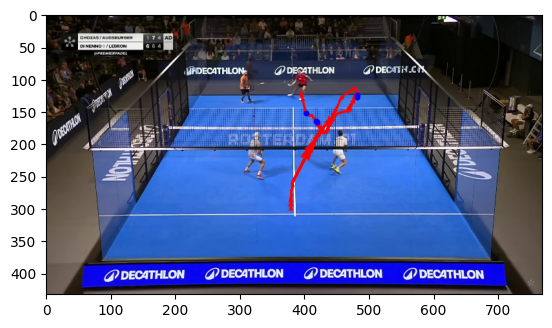

In [ ]:
new_coordinates = tf.reshape(path, (-1, 2))
plt.scatter(new_coordinates[:, 0], new_coordinates[:, 1], s=0.1)
speed_vectors = new_coordinates[:-1] - new_coordinates[1:]
plt.quiver(
    new_coordinates[:-1, 0],
    new_coordinates[:-1, 1],
    -speed_vectors[:, 0],
    -speed_vectors[:, 1],
    angles="xy",
    scale_units="xy",
    scale=0.5,
    color="r",
)
plt.scatter(
    new_coordinates[1:-1][angles.numpy()][:, 0],
    new_coordinates[1:-1][angles.numpy()][:, 1],
    color="b",
    s=10,
)
plt.xlim(0, 768)  # Étendre l'axe X
plt.ylim(0, 432)
plt.gca().invert_yaxis()
plt.imshow(image)

In [185]:
image = next(iter(trackNetDataset.clip(1, 14, 1, 432, 768).take(20)))[0][0, ..., 0:3]

ClipDataset(game='game1', clip='Clip14', clip_path=PosixPath('../data/tennis/input/game1/Clip14'))
DDDDDDD
(None, None, 3)
DDDDDDD
(None, None, 3)


2025-03-15 16:40:51.653583: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

frames = []  # List to store frames


for d in trackNetDataset.clip(1, 14, 1, 432, 768).take(20):
    coordinates = getPredictions(d[0])

    for i in range(5):
        image = d[0][0, ..., i * 3 : i * 3 + 3]
        coordinate = coordinates[i]

        fig, ax = plt.subplots()
        ax.imshow(image)

        # Draw rectangle centered on the predicted point
        rect_size = 20  # Rectangle size
        rect = plt.Rectangle(
            (int(coordinate[0]) - rect_size // 2, int(coordinate[1]) - rect_size // 2),
            rect_size,
            rect_size,
            linewidth=2,
            edgecolor="r",
            facecolor="none",
        )
        ax.add_patch(rect)

        # Hide axes for a clean output
        ax.set_xticks([])
        ax.set_yticks([])

        # Save frame as an image in memory
        fig.canvas.draw()
        frame = Image.frombytes(
            "RGBA", fig.canvas.get_width_height(), fig.canvas.buffer_rgba()
        )
        frames.append(frame)

        plt.close(fig)  # Close figure to save memory

# Save as GIF
frames[0].save(
    "output.gif",
    save_all=True,
    append_images=frames[1:],
    duration=10,  # Frame duration in ms
    loop=0,  # Infinite loop
)

print("GIF saved as output.gif 🎉")

ClipDataset(game='game1', clip='Clip14', clip_path=PosixPath('../data/tennis/input/game1/Clip14'))
DDDDDDD
(None, None, 3)
DDDDDDD
(None, None, 3)


2025-03-15 16:23:05.582151: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 23887872 bytes after encountering the first element of size 23887872 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2025-03-15 16:23:05.583718: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 23887872 bytes after encountering the first element of size 23887872 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


2025-03-15 16:23:12.389186: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


GIF saved as output.gif 🎉


In [ ]:
input_data = np.random.rand(1, 15, 432, 768).astype(np.float32)
input_tensor = tf.convert_to_tensor(input_data)

model(input_tensor)

2025-03-09 20:18:33.513200: W tensorflow/core/framework/op_kernel.cc:1829] INVALID_ARGUMENT: required broadcastable shapes


InvalidArgumentError: Graph execution error:

Detected at node functional_1/batch_normalization_1/batchnorm/mul_1 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/usr/lib/python3.12/asyncio/base_events.py", line 1987, in _run_once

  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/tmp/ipykernel_57998/1645341683.py", line 9, in <module>

  File "/tmp/ipykernel_57998/1645341683.py", line 7, in predict_step

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/models/functional.py", line 182, in call

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/models/functional.py", line 637, in call

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/layers/normalization/batch_normalization.py", line 278, in call

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/ops/nn.py", line 2204, in batch_normalization

  File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py", line 870, in batch_normalization

required broadcastable shapes
	 [[{{node functional_1/batch_normalization_1/batchnorm/mul_1}}]] [Op:__inference_predict_step_12674]

In [8]:
import numpy as np
import tensorflow as tf
from tiny_ball_detector.models.gridtracknet import GridTrackNet
from tiny_ball_detector.test.time import time_model

time_model(GridTrackNet(5, 720, 1280), (1, 15, 720, 1280), 1000)

Temps de prédiction du modèle (sans overhead Python) : 0.002756 secondes


0.002755865704999451

In [6]:
import numpy as np
import tensorflow as tf
from tiny_ball_detector.models.tracknet import TrackerNet
from tiny_ball_detector.test.time import time_model

time_model(TrackerNet(), (1, 360, 640, 9), 100)

Temps de prédiction du modèle (sans overhead Python) : 0.023701 secondes


0.023701363389991455

In [ ]:
from typing import Tuple
import timeit
import keras


def time_model(model: keras.Model, shape: Tuple[int, ...], n: int) -> float:
    input_data = np.random.rand(*shape).astype(np.float32)

    input_tensor = tf.convert_to_tensor(input_data)

    @tf.function
    def predict_step(input_tensor):
        return model(input_tensor, training=False)

    _ = predict_step(input_tensor)

    time = timeit.timeit(lambda: predict_step(input_tensor), number=n) / n

    # Affichage du temps d'inférence
    print(f"Temps de prédiction du modèle (sans overhead Python) : {time:.6f} secondes")
    return time


time_model(
    model,
    (
        1,
        15,
        432,
        768,
    ),
    100,
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


AttributeError: in user code:

    File "/tmp/ipykernel_57998/4097724121.py", line 13, in predict_step  *
        return model.predict(input_tensor)
    File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/home/gaetan/.cache/pypoetry/virtualenvs/tiny-ball-detector-LtrcJND9-py3.12/lib/python3.12/site-packages/optree/ops.py", line 766, in tree_map
        return treespec.unflatten(map(func, *flat_args))

    AttributeError: 'SymbolicTensor' object has no attribute 'numpy'


In [ ]:
import os
import cv2
import subprocess


# --- Step 1: Download Video with yt-dlp ---
def download_video(url, output_filename="video.mp4"):
    command = [
        "yt-dlp",
        "-f",
        "bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4",
        "-o",
        output_filename,
        url,
    ]
    subprocess.run(command, check=True)
    print(f"Downloaded video as {output_filename}")
    return output_filename


# --- Step 2: Extract Frames ---
def extract_frames(video_path, output_folder="frames", frame_rate=1):
    os.makedirs(output_folder, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_interval = int(fps / frame_rate) if fps else 1

    frame_id = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_filename = os.path.join(output_folder, f"frame_{frame_id:04d}.jpg")
        cv2.imwrite(frame_filename, frame)
        print(f"Saved {frame_filename}")
        frame_id += 1

    cap.release()
    print("Frame extraction complete!")


# --- Step 3: Run ---
youtube_url = "https://www.youtube.com/watch?v=bi1XWPN7S1A"
video_file = download_video(youtube_url)
extract_frames(video_file, frame_rate=1)  # Extract 1 frame per second

[youtube] Extracting URL: https://www.youtube.com/watch?v=bi1XWPN7S1A
[youtube] bi1XWPN7S1A: Downloading webpage
[youtube] bi1XWPN7S1A: Downloading tv client config
[youtube] bi1XWPN7S1A: Downloading player f6e09c70
[youtube] bi1XWPN7S1A: Downloading tv player API JSON
[youtube] bi1XWPN7S1A: Downloading ios player API JSON
[youtube] bi1XWPN7S1A: Downloading m3u8 information
[info] bi1XWPN7S1A: Downloading 1 format(s): 616+140
[download] video.mp4 has already been downloaded
Downloaded video as video.mp4
Saved frames/frame_0000.jpg
Saved frames/frame_0001.jpg
Saved frames/frame_0002.jpg
Saved frames/frame_0003.jpg
Saved frames/frame_0004.jpg
Saved frames/frame_0005.jpg
Saved frames/frame_0006.jpg
Saved frames/frame_0007.jpg
Saved frames/frame_0008.jpg
Saved frames/frame_0009.jpg
Saved frames/frame_0010.jpg
Saved frames/frame_0011.jpg
Saved frames/frame_0012.jpg
Saved frames/frame_0013.jpg
Saved frames/frame_0014.jpg
Saved frames/frame_0015.jpg
Saved frames/frame_0016.jpg
Saved frames/fr

KeyboardInterrupt: 